In [12]:
import numpy as np
import pyamg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

from scipy.sparse.linalg import eigsh
import scipy
%matplotlib inline


In [6]:
results_df = pd.read_csv('Poisson_Perturbed_b_v2.csv')

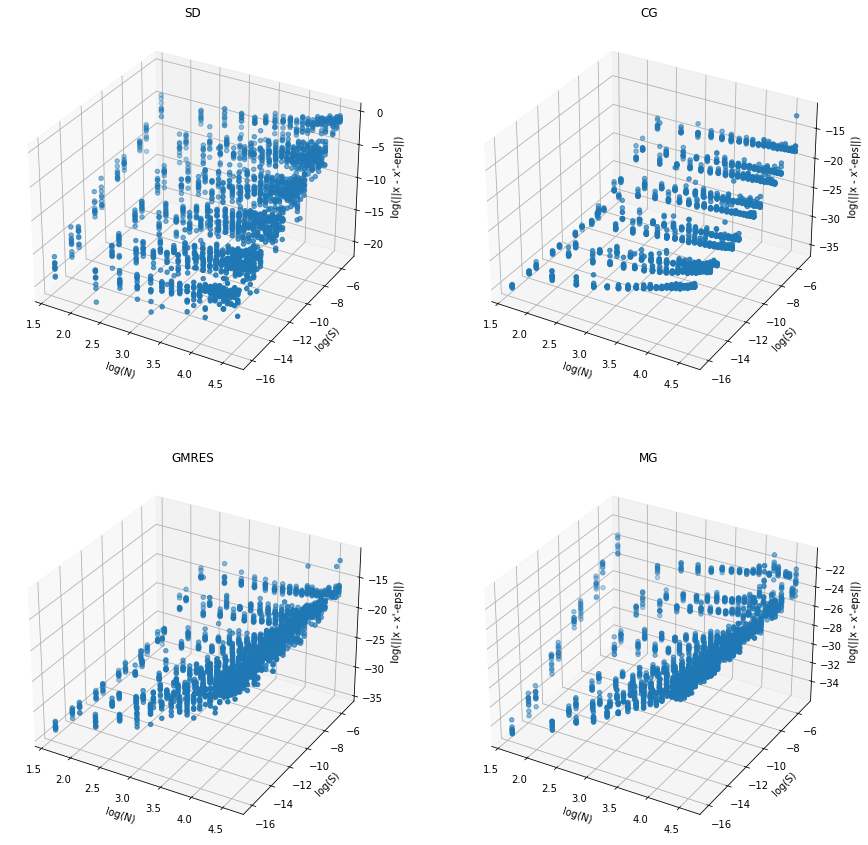

In [14]:
methods = [('SD',1),('CG',2),('GMRES',3),('MG',4)]
target = ['norm(y-x-eps)']
features = ['N','sigma']

fig = plt.figure(figsize=(15,15))

for name, index in methods:
    method_results = results_df[results_df['Method']==name]

    X = method_results.loc[:,features]
    Y = method_results.loc[:,target]

#    reg = LinearRegression(normalize=True).fit(np.log(X), np.log(Y))
#    reg.score(np.log(X), np.log(Y)), reg.coef_, reg.intercept_
    
    ax = fig.add_subplot(2, 2, index, projection='3d')
    ax.set_title(name)
    ax.set_xlabel('log(N)')
    ax.set_ylabel('log(S)')
    ax.set_zlabel('log(||x - x\'-eps||)')
    ax.scatter3D(np.log(X[features[0]])/2, np.log(X[features[1]]), np.log(Y), 'gray')

plt.show()

In [15]:
for name, index in methods:
    method_results = results_df[results_df['Method']==name]
    X = method_results.loc[:,features]
    Y = method_results.loc[:,target]
    reg = LinearRegression(normalize=True).fit(np.log(X), np.log(Y))
    print("{} & {} & {} & {} & {}\\\\".format(name, reg.coef_[0,0], reg.coef_[0,1], reg.intercept_[0], reg.score(np.log(X), np.log(Y)),))

SD & 0.7898950499457362 & 1.0254022290318652 & -4.133957825346588 & 0.9137722446288854\\
CG & 1.3369265761926155 & 0.8106792842908259 & -25.745432426855345 & 0.810656648130422\\
GMRES & 2.226147238252259 & 0.28091122059357915 & -35.03397480329251 & 0.8551535378129239\\
MG & 1.100806319369243 & 0.34133318335138646 & -31.17709833105709 & 0.7484829046185579\\
